## Data Loading

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

In [ ]:
file = tf.keras.utils
raw_df = pd.read_csv('/content/drive/MyDrive/Oxford/background.csv')
cleaned_df = raw_df.copy()

train_df = pd.read_csv('/content/drive/MyDrive/Oxford/train.csv')
outcomes_df = train_df.copy()

<ipython-input-2-f07354eb9be6>:2: DtypeWarning: Columns (5168,5272,5328,5329,5340,5341,5351,5470,5479,5661,5663,5685,5695,5696,5706,5764,5772,5788,5803,5815,5816,5828,5900,5901,5937,5946,5965,5966,9287,12349,12353,12356) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('/content/drive/MyDrive/Oxford/background.csv')


In [ ]:
cleaned_df

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,1,-3,-3,-9,-9,-3,0,-3,-3,-3,...,6.269946,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
1,2,-3,-3,0,40,-3,1,-3,-3,-3,...,6.269946,27.680196,2.511131,1.718804,6.473537,16.369411,26.671897,9.628369,15.981275,3.667679
2,3,-3,-3,0,45,-3,1,-3,-3,-3,...,6.269946,5.180325,20.867881,24.115867,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
3,4,-3,-3,0,45,-3,1,-3,-3,-3,...,6.269946,5.180325,22.018875,22.932641,6.473537,-5.169243,4.476881,9.628369,-6.303171,4.140511
4,5,-3,-3,-6,50,-3,1,-3,-3,-3,...,6.269946,5.180325,22.916602,22.988036,6.473537,-6.034660,4.476881,9.628369,-6.211828,3.668879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,4238,-3,-3,-9,-9,-3,0,-3,-3,-3,...,27.941956,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
4238,4239,-3,-3,0,40,-3,1,-3,-3,-3,...,28.703663,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,3.424922
4239,4240,-3,-3,-9,-9,-3,0,-3,-3,-3,...,6.269946,26.990283,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
4240,4241,-3,-3,1,0,-3,1,-3,-3,-3,...,6.269946,27.189692,2.511131,1.718804,28.512659,16.369411,4.476881,9.628369,-6.009855,3.656543


In [ ]:
outcomes_df

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,2.50,3.25,0.000000,0.0,0.0,0.0
4,8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2116,4235,NaN,NaN,NaN,NaN,NaN,NaN
2117,4236,NaN,3.75,0.000000,0.0,0.0,0.0
2118,4239,2.75,2.75,0.000000,0.0,0.0,0.0
2119,4240,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Data Preparation
- Cast any strings to numeric where applicable
- Cast categorical variables as integer representations
(-3, -9 = NaN, -10 = Other, -11 = unknown or refuse)
- Remove columns that didn't fit into either of those
- Remove columns with no variation or all null

In [ ]:
categorical = cleaned_df.loc[:, cleaned_df.nunique() < 30]
numerical = cleaned_df.loc[:, cleaned_df.nunique() >= 30]

In [ ]:
#Replace numerical values that are missing with NaN
categorical = categorical.replace("Missing", np.NAN)
categorical = categorical.replace('NA', np.NAN)
categorical = categorical.replace('Other', -10)

numerical = numerical.replace(-3, np.NaN)
numerical = numerical.replace(-9, np.NaN)
numerical = numerical.replace(-6, np.NaN)
numerical = numerical.replace(-1, np.NaN)
numerical = numerical.replace(-2, np.NaN)
numerical = numerical.replace("Other", np.NaN)

In [ ]:
#Dropping columns with more than 80% missing
missing_percentage = categorical.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 80].index
categorical = categorical.drop(columns_to_drop, axis=1)

categorical.cf4fint = pd.to_datetime(categorical.cf4fint)
categorical = categorical.drop(categorical.columns[categorical.nunique() == 1],axis=1)

#Dropping columns with more than 80% missing
missing_percentage = numerical.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 80].index
numerical = numerical.drop(columns_to_drop, axis=1)
numerical = numerical.drop(numerical.columns[numerical.nunique() == 1],axis=1)

In [ ]:
string_columns = ['ch5ppvtae', 'ch5wj9ae', 'ch5wj10ae']
convert_to_float = ['ch5wj9pr','ch5ppvtpr','ch5wj10pr']

# Drop string columns from df1 and add them to df2
for column in string_columns:
    categorical[column] = numerical[column]  # Add string column to df2
    numerical.drop(column, axis=1, inplace=True)  # Drop string column from df1

# Convert columns to floats
numerical = numerical.replace("<0.1", "0")
for column in convert_to_float:
  numerical[column] = numerical[column].astype(float)

In [ ]:
#Impute missing data using knn
from sklearn.impute import KNNImputer
numerical = numerical.astype(float)
imputer = KNNImputer(n_neighbors=3)  # You can adjust the number of neighbors as needed
numerical_imputed = pd.DataFrame(imputer.fit_transform(numerical), columns=numerical.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each string column and apply label encoding
for column in string_columns:
    categorical[column] = label_encoder.fit_transform(categorical[column])

In [ ]:
# Removing variables of interest from training data after their missing values have been imputed
selected_columns = categorical.loc[:,categorical.columns.str.startswith('m2b25a')]
categorical = categorical.drop(selected_columns.columns, axis=1)

In [ ]:
cat_columns = categorical.columns
one_hot = pd.get_dummies(categorical, columns=cat_columns)
result = pd.concat([numerical_imputed, one_hot], axis=1)
result = result.dropna(axis='columns')

In [ ]:
train_ids = outcomes_df.challengeID.values.tolist()
X_train = result[result['challengeID'].isin(train_ids)]
y_train = outcomes_df.copy()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                               initial_strategy='mean',
                               max_iter=10, random_state=0)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(),
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)

In [ ]:
# Define a function to replace specific values
def replace_values(x):
    return x.replace([-9, -6, -2], -1)

# Apply the function to each column
selected_columns = selected_columns.apply(replace_values)

In [ ]:
# Define a function to replace specific values
def replace_values(x):
    return x.replace([2], 0)

# Apply the function to each column
selected_columns = selected_columns.apply(replace_values)

In [ ]:
selected_columns['challengeID'] = X_train['challengeID']

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
X_train.set_index('challengeID', inplace=True)

In [ ]:
y_train.set_index('challengeID', inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.50, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

# parameters to be tested on GridSearchCV
#params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
#kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
#lasso = Lasso()

# GridSearchCV with model, params and folds.
#lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
#lasso_cv.fit(X_train, y_train)
#print("Best Params {}".format(lasso_cv.best_params_))

In [ ]:
# calling the model with the best parameter
not_missing_indices = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_indices]
y_train_filtered = y_train['gpa'][not_missing_indices]

lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train_filtered, y_train_filtered)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

names=X_train.columns

# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso1_coef>0.001]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e-01, tolerance: 3.626e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
X_train = X_train[feature_subset]
X_val = X_val[feature_subset]
X_test = X_test[feature_subset]

### Mutual Information Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
not_missing_indices = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_indices]
y_train_filtered = y_train['gpa'][not_missing_indices]

mutual_info = mutual_info_regression(X_train_filtered, y_train_filtered)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

m1a11d_2      0.090167
cm2alvf       0.089672
ch5wj10ss     0.089296
ch5wj10raw    0.084860
f4k21         0.081421
                ...   
f4i2_2        0.000000
f4i23p3_3     0.000000
f4i23p5_1     0.000000
f4i23p6_3     0.000000
cf5povca_4    0.000000
Length: 2013, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=1)
selected_top_columns.fit(X_train_filtered, y_train_filtered)
selected_top_columns.get_support()

array([False, False, False, ..., False, False, False])

In [ ]:
columns = X_train.columns[selected_top_columns.get_support()]
X_train = X_train[columns]
X_val = X_val[columns]
X_test = X_test[columns]

In [ ]:
X_train = pd.merge(X_train, selected_columns, how='left', left_index=True, right_on = 'challengeID')
X_train.reset_index(drop=True, inplace=True)
X_val = pd.merge(X_val, selected_columns, how='left', left_index=True, right_on = 'challengeID')
X_val.reset_index(drop=True, inplace=True)
X_test = pd.merge(X_test, selected_columns, how='left', left_index=True, right_on = 'challengeID')
X_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train.drop(columns=['challengeID'], inplace=True)
X_val.drop(columns=['challengeID'], inplace=True)
X_test.drop(columns=['challengeID'], inplace=True)

In [ ]:
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Model Testing - Continuous

### Linear Regression

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform

In [ ]:
for col in outcomes_df.columns[1:4]:

  model = LinearRegression(copy_X=False)
  param_distributions = {'fit_intercept': [True, False], 'positive': [True, False],
                       'copy_X': [True, False], 'n_jobs': [1, 2, 3, 4, -1]}

  not_missing_indices = ~y_train[col].isnull()
  X_train_filtered = X_train[not_missing_indices]
  y_train_filtered = y_train[col][not_missing_indices]

  not_missing_val = ~y_val[col].isnull()
  X_val_filtered = X_val[not_missing_val]
  y_val_filtered = y_val[col][not_missing_val]

  random_search = RandomizedSearchCV(model, param_distributions, cv=5, scoring='neg_mean_squared_error', n_iter=5)
  random_search.fit(X_train_filtered, y_train_filtered)

  best_lin = random_search.best_estimator_
  score = cross_val_score(best_lin,X_val_filtered,y_val_filtered,cv=10)

  print(f"{col}: {np.mean(abs(score))}")

gpa: 0.10303470606607654
grit: 0.03035041100955498
materialHardship: 0.10846354251817014


### XGBoost

In [ ]:
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9]', '_')
X_val.columns = X_val.columns.str.replace(r'[^a-zA-Z0-9]', '_')
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9]', '_')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

for col in outcomes_df.columns[1:4]:
  xreg = xgboost.XGBRegressor()

  params = {
  'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
  'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
  'min_child_weight': [ 1, 3, 5, 7 ],
  'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
  }

  not_missing_indices = ~y_train[col].isnull()
  X_train_filtered = X_train[not_missing_indices]
  y_train_filtered = y_train[col][not_missing_indices]

  not_missing_val = ~y_val[col].isnull()
  X_val_filtered = X_val[not_missing_val]
  y_val_filtered = y_val[col][not_missing_val]

  rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
  rs_model.fit(X_train_filtered,y_train_filtered)

  regressor=rs_model.best_estimator_
  score=cross_val_score(regressor,X_val_filtered,y_val_filtered,cv=10)

  print(f"{col}: {np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
gpa: 0.12116728049251677
Fitting 5 folds for each of 5 candidates, totalling 25 fits
grit: 0.1013684868007119
Fitting 5 folds for each of 5 candidates, totalling 25 fits
materialHardship: 0.026401149085138464


### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

for col in outcomes_df.columns[1:4]:
  rf = RandomForestRegressor(random_state = 42)

  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

  not_missing_indices = ~y_train[col].isnull()
  X_train_filtered = X_train[not_missing_indices]
  y_train_filtered = y_train[col][not_missing_indices]

  not_missing_val = ~y_val[col].isnull()
  X_val_filtered = X_val[not_missing_val]
  y_val_filtered = y_val[col][not_missing_val]

  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  rf_random.fit(X_train_filtered, y_train_filtered)

  best_rf = rf_random.best_estimator_
  score=cross_val_score(best_rf,X_val_filtered,y_val_filtered,cv=10)
  print(f"{col}: {np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
gpa: 0.11001299088901648
Fitting 5 folds for each of 5 candidates, totalling 25 fits
grit: 0.05797968310034078
Fitting 5 folds for each of 5 candidates, totalling 25 fits
materialHardship: 0.03297796413002378


## Model Testing - Categorical

In [ ]:
merged_df = X_train.join(y_train)

In [ ]:
# Upsample class 'B' to have the same number of rows as class 'A'
not_missing_indices = ~merged_df['eviction'].isnull()
merged_df_filtered = merged_df['eviction'][not_missing_indices]

upsampled_class_1_evic = merged_df[merged_df['eviction'] == 1.0].sample(n=merged_df['eviction'].value_counts()[0.0], replace=True)

# Concatenate original DataFrame with upsampled class 'B'
upsampled_df_evic = pd.concat([merged_df[merged_df['eviction'] == 0.0], upsampled_class_1_evic], ignore_index=True)
X_train_evic = upsampled_df_evic.iloc[:,:-6]
Y_train_evic = upsampled_df_evic.iloc[:,-6:]

In [ ]:
# Upsample class 'B' to have the same number of rows as class 'A'
not_missing_indices = ~merged_df['layoff'].isnull()
merged_df_filtered = merged_df['layoff'][not_missing_indices]

upsampled_class_1_layoff = merged_df[merged_df['layoff'] == 1.0].sample(n=merged_df['layoff'].value_counts()[0.0], replace=True)

# Concatenate original DataFrame with upsampled class 'B'
upsampled_df_layoff = pd.concat([merged_df[merged_df['layoff'] == 0.0], upsampled_class_1_layoff], ignore_index=True)
X_train_layoff = upsampled_df_layoff.iloc[:,:-6]
Y_train_layoff = upsampled_df_layoff.iloc[:,-6:]

In [ ]:
# Upsample class 'B' to have the same number of rows as class 'A'
not_missing_indices = ~merged_df['jobTraining'].isnull()
merged_df_filtered = merged_df['jobTraining'][not_missing_indices]

upsampled_class_1_job = merged_df[merged_df['jobTraining'] == 1.0].sample(n=merged_df['jobTraining'].value_counts()[0.0], replace=True)

# Concatenate original DataFrame with upsampled class 'B'
upsampled_df_job = pd.concat([merged_df[merged_df['jobTraining'] == 0.0], upsampled_class_1_job], ignore_index=True)
X_train_job = upsampled_df_job.iloc[:,:-6]
Y_train_job = upsampled_df_job.iloc[:,-6:]

### Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
not_missing_test = ~y_test['eviction'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['eviction'][not_missing_test]

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_evic, Y_train_evic['eviction'])
model.score(X_test_filtered, y_test_filtered)

0.6468253968253969

In [ ]:
not_missing_test = ~y_test['layoff'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['layoff'][not_missing_test]

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_layoff, Y_train_layoff['layoff'])
model.score(X_test_filtered, y_test_filtered)

0.5351473922902494

In [ ]:
not_missing_test = ~y_test['jobTraining'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['jobTraining'][not_missing_test]

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_job, Y_train_job['jobTraining'])
model.score(X_test_filtered, y_test_filtered)

0.6099009900990099

### XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_val = ~y_val['eviction'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['eviction'][not_missing_val]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_evic,Y_train_evic['eviction'])

classifier=rs_model.best_estimator_
score=cross_val_score(classifier,X_val_filtered,y_val_filtered,cv=10)

print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9610105580693815


In [ ]:
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_val = ~y_val['layoff'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['layoff'][not_missing_val]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_layoff,Y_train_layoff['layoff'])

classifier=rs_model.best_estimator_
score=cross_val_score(classifier,X_val_filtered,y_val_filtered,cv=10)

print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7329951690821256


In [ ]:
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_val = ~y_val['jobTraining'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['jobTraining'][not_missing_val]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_job,Y_train_job['jobTraining'])

classifier=rs_model.best_estimator_
score=cross_val_score(classifier,X_val_filtered,y_val_filtered,cv=10)

print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.6861613876319759


### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_val = ~y_val['eviction'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['eviction'][not_missing_val]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_evic, Y_train_evic['eviction'])

best_rf = rf_random.best_estimator_
score=cross_val_score(best_rf,X_val_filtered, y_val_filtered,cv=10)
print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9610105580693815


In [ ]:
rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_val = ~y_val['layoff'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['layoff'][not_missing_val]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_layoff, Y_train_layoff['layoff'])

best_rf = rf_random.best_estimator_
score=cross_val_score(best_rf,X_val_filtered, y_val_filtered,cv=10)
print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7726086956521738


In [ ]:
rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_val = ~y_val['jobTraining'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['jobTraining'][not_missing_val]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_job, Y_train_job['jobTraining'])

best_rf = rf_random.best_estimator_
score=cross_val_score(best_rf,X_val_filtered, y_val_filtered,cv=10)
print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7173076923076923


## Best Models

In [ ]:
## GPA
from sklearn.metrics import mean_squared_error

not_missing_train = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['gpa'][not_missing_train]

not_missing_val = ~y_val['gpa'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['gpa'][not_missing_val]

not_missing_test = ~y_test['gpa'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['gpa'][not_missing_test]

xreg = xgboost.XGBRegressor()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_filtered,y_train_filtered)

gpa_best=rs_model.best_estimator_

gpa_preds = gpa_best.predict(X_test_filtered)
print(mean_squared_error(y_test_filtered, gpa_preds))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.2678770110209365


In [ ]:
## Grit
not_missing_train = ~y_train['grit'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['grit'][not_missing_train]

not_missing_val = ~y_val['grit'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['grit'][not_missing_val]

not_missing_test = ~y_test['grit'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['grit'][not_missing_test]

rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_filtered, y_train_filtered)

grit_best=rs_model.best_estimator_

grit_preds = grit_best.predict(X_test_filtered)
print(mean_squared_error(y_test_filtered, grit_preds))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.6631946547289869


In [ ]:
## Hardship

xreg = xgboost.XGBRegressor()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_train = ~y_train['materialHardship'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['materialHardship'][not_missing_train]

not_missing_val = ~y_val['materialHardship'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['materialHardship'][not_missing_val]

not_missing_test = ~y_test['materialHardship'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['materialHardship'][not_missing_test]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_filtered,y_train_filtered)

hardship_best=rs_model.best_estimator_
hardship_preds = hardship_best.predict(X_test_filtered)
print(mean_squared_error(y_test_filtered, hardship_preds))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.020895049542779685


In [ ]:
## Eviction
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}
not_missing_train = ~y_train['eviction'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['eviction'][not_missing_train]

not_missing_test = ~y_test['eviction'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['eviction'][not_missing_test]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_filtered,y_train_filtered)

best_evic=rs_model.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
evic_preds = best_evic.predict(X_test_filtered)

print(accuracy_score(y_test_filtered, evic_preds))
print(precision_recall_fscore_support(y_test_filtered, evic_preds, average='weighted'))

0.9285714285714286
(0.933683612610054, 0.9285714285714286, 0.8960623207503295, None)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_filtered, evic_preds, target_names=["No Eviction","Eviction"]))

              precision    recall  f1-score   support

 No Eviction       0.93      1.00      0.96       467
    Eviction       1.00      0.03      0.05        37

    accuracy                           0.93       504
   macro avg       0.96      0.51      0.51       504
weighted avg       0.93      0.93      0.90       504



In [ ]:
## Layoff

rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_train = ~y_train['layoff'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['layoff'][not_missing_train]

not_missing_test = ~y_test['layoff'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['layoff'][not_missing_test]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_filtered, y_train_filtered)

layoff_best = rf_random.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
layoff_preds = layoff_best.predict(X_test_filtered)

print(accuracy_score(y_test_filtered, layoff_preds))
print(precision_recall_fscore_support(y_test_filtered, layoff_preds, average='weighted'))

0.8095238095238095
(0.8462210572302316, 0.8095238095238095, 0.7345697108090455, None)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_filtered, layoff_preds, target_names=["No Layoff","Layoff"]))

              precision    recall  f1-score   support

   No Layoff       0.81      1.00      0.89       352
      Layoff       1.00      0.06      0.11        89

    accuracy                           0.81       441
   macro avg       0.90      0.53      0.50       441
weighted avg       0.85      0.81      0.73       441



In [ ]:
## Job training

rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_train = ~y_train['jobTraining'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['jobTraining'][not_missing_train]

not_missing_test = ~y_test['jobTraining'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['jobTraining'][not_missing_test]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_filtered, y_train_filtered)

job_best = rf_random.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
job_preds = job_best.predict(X_test_filtered)

print(accuracy_score(y_test_filtered, job_preds))
print(precision_recall_fscore_support(y_test_filtered, job_preds, average='weighted'))

0.8376237623762376
(0.865773554099596, 0.8376237623762376, 0.7997303097889698, None)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_filtered, job_preds, target_names=["No Job Training","Job Training"]))

                 precision    recall  f1-score   support

No Job Training       0.83      1.00      0.91       391
   Job Training       1.00      0.28      0.44       114

       accuracy                           0.84       505
      macro avg       0.91      0.64      0.67       505
   weighted avg       0.87      0.84      0.80       505



## XGBoost Feature Importance

<Axes: >

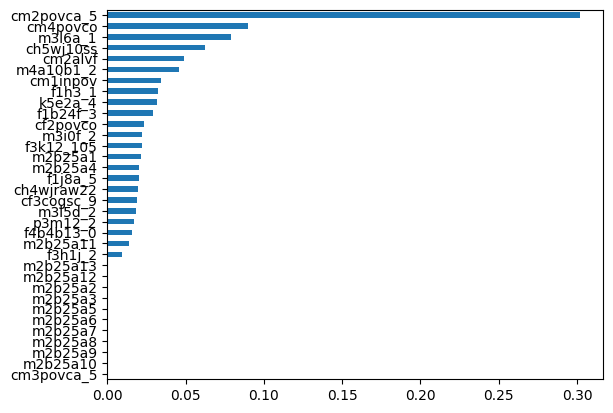

In [ ]:
feat_importances = pd.Series(gpa_best.feature_importances_, index=X_train.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')

<Axes: >

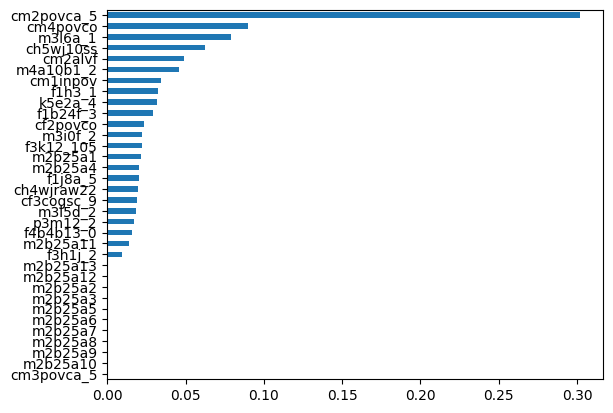

In [ ]:
feat_importances = pd.Series(grit_best.feature_importances_, index=X_train.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')

## SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import shap

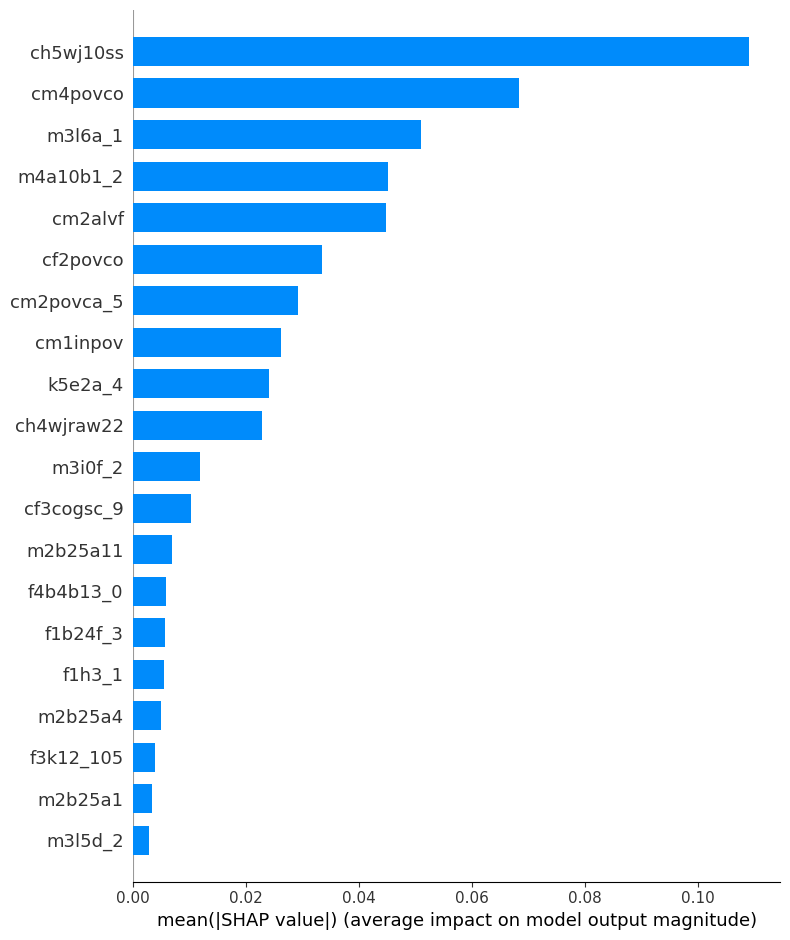

In [ ]:
explainer = shap.TreeExplainer(gpa_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type = 'bar')

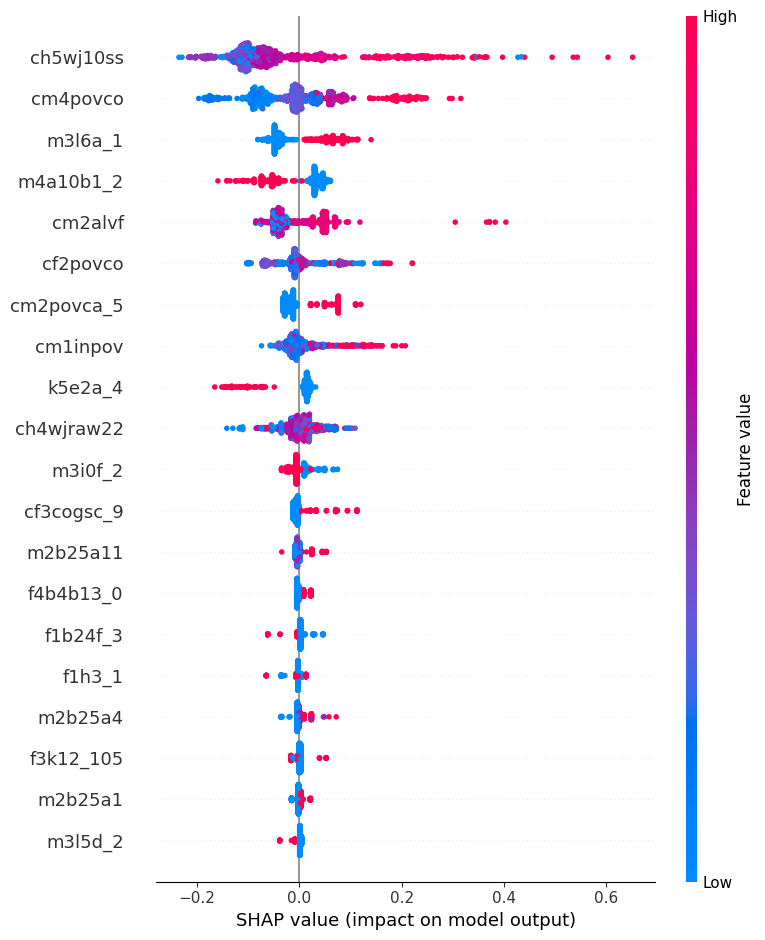

In [ ]:
explainer = shap.Explainer(gpa_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
interest_variables = X_test.iloc[:,21:]

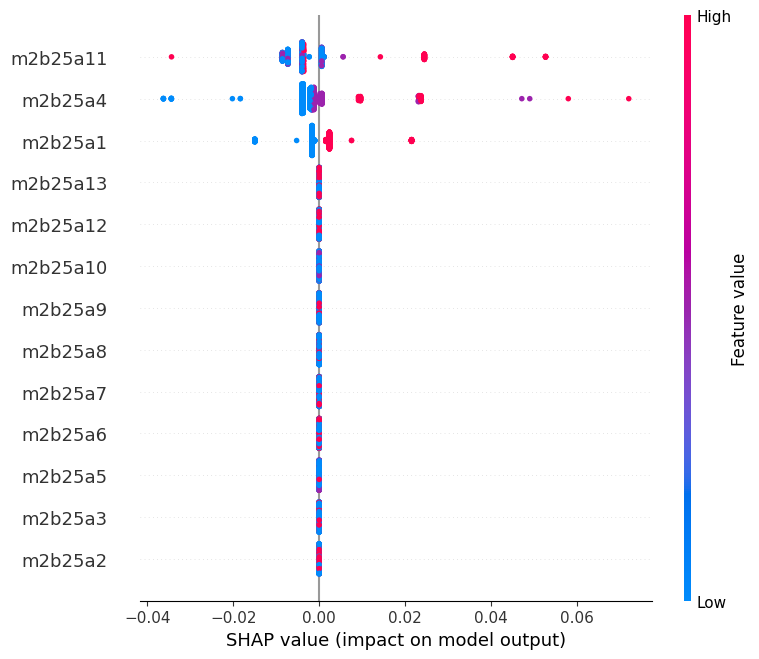

In [ ]:
# Summary plot for feature importance?
shap_interest = shap_values[:, 21:]
shap.summary_plot(shap_interest, interest_variables)

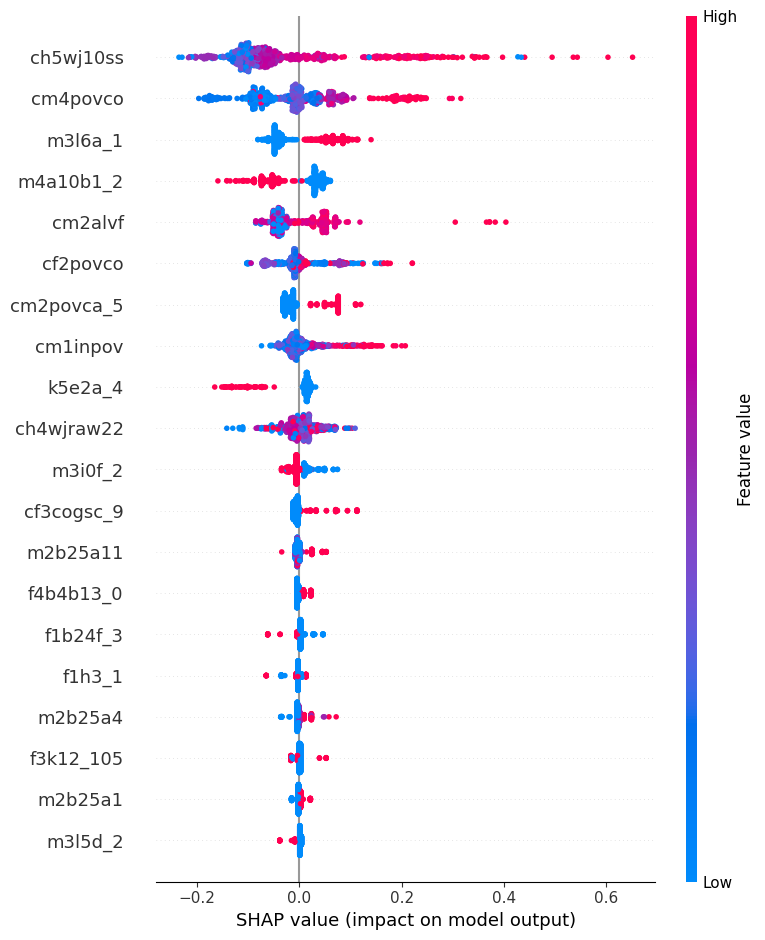

In [ ]:
explainer = shap.Explainer(grit_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

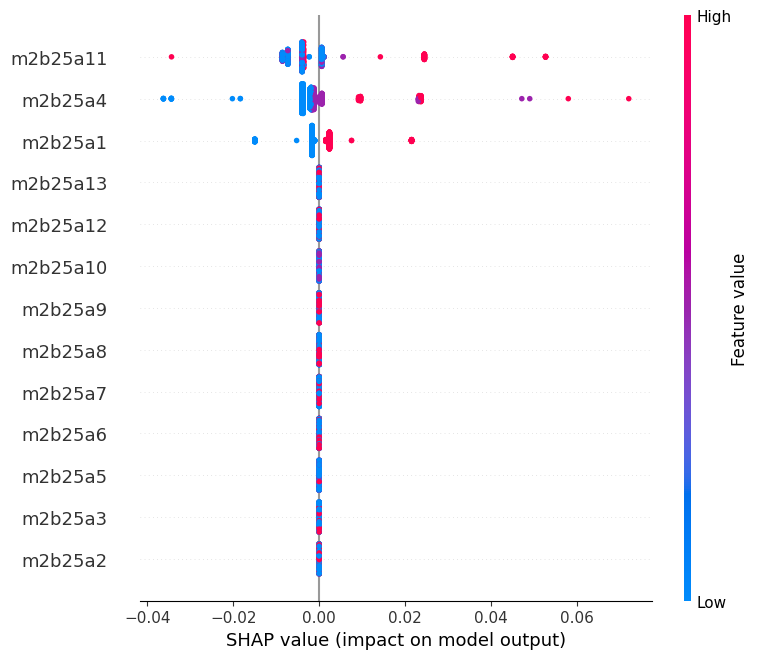

In [ ]:
shap_interest = shap_values[:, 21:]
shap.summary_plot(shap_interest, interest_variables)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=64f17d2062e87ac42841bd71f8e67afa08cbac5878a5eee848bb1bf8a5495323
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
y_test.loc[201]

gpa                NaN
grit               NaN
materialHardship   NaN
eviction           NaN
layoff             NaN
jobTraining        NaN
Name: 201, dtype: float64

In [ ]:
X_test.loc[32]

cm1inpov      3.664078
cf2povco      5.732968
cm2alvf           -7.0
cm4povco      3.939485
ch4wjraw22        11.0
ch5wj10ss        106.0
f1b24f_3         False
f1h3_1           False
f1j8a_5          False
cm2povca_5       False
f3h1j_2          False
f3k12_105        False
cf3cogsc_9       False
m3i0f_2           True
m3l5d_2          False
m3l6a_1          False
cm3povca_5       False
p3m12_2           True
f4b4b13_0        False
m4a10b1_2        False
k5e2a_4          False
m2b25a1              0
m2b25a2              0
m2b25a3              0
m2b25a4              1
m2b25a5              1
m2b25a6              0
m2b25a7              1
m2b25a8              0
m2b25a9              0
m2b25a10             0
m2b25a11             0
m2b25a12             0
m2b25a13             0
Name: 32, dtype: object

In [ ]:
X_test[X_test['m2b25a4']==1]

,cm1inpov,cf2povco,cm2alvf,cm4povco,ch4wjraw22,ch5wj10ss,f1b24f_3,f1h3_1,f1j8a_5,cm2povca_5,...,m2b25a4,m2b25a5,m2b25a6,m2b25a7,m2b25a8,m2b25a9,m2b25a10,m2b25a11,m2b25a12,m2b25a13
4,0.359339,0.473671,-7.000000,1.893903,13.000000,92.000000,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
10,3.339650,6.045448,29.000000,4.380779,8.000000,110.000000,False,True,True,True,...,1,0,0,0,0,0,0,0,0,0
32,3.664078,5.732968,-7.000000,3.939485,11.000000,106.000000,False,False,False,False,...,1,1,0,1,0,0,0,0,0,0
52,0.393740,1.006678,27.000000,2.727807,11.666667,98.000000,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
59,2.427935,1.764607,-7.000000,1.786619,9.333333,85.666667,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,4.844170,0.861110,18.000000,2.445539,8.000000,98.666667,False,True,False,True,...,1,0,0,0,0,0,0,0,0,0
728,2.857882,2.582572,-7.000000,1.382466,5.000000,77.000000,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
735,1.542007,2.181825,34.000000,1.259336,12.000000,100.000000,False,False,False,False,...,1,1,0,0,0,0,0,0,0,0
737,0.326526,0.082907,1.333333,0.901717,17.000000,107.000000,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0


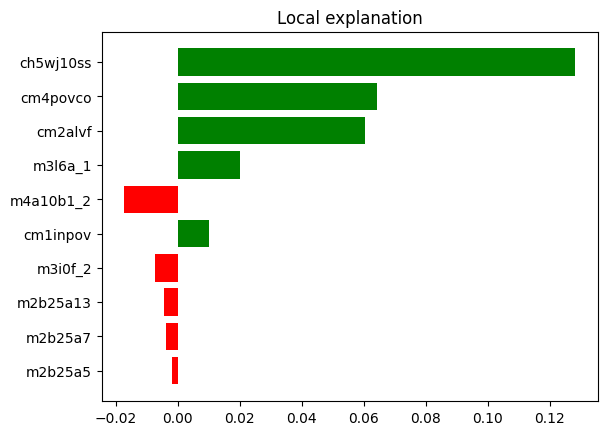

In [ ]:
import lime
import lime.lime_tabular
# Generate explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, mode='regression',feature_names=X_test.columns.tolist(), discretize_continuous=False, random_state=1984)
# Generate explanation for instance i
i = 32
exp = explainer.explain_instance(X_test.values[i], grit_best.predict)
# Plot
fig = exp.as_pyplot_figure();

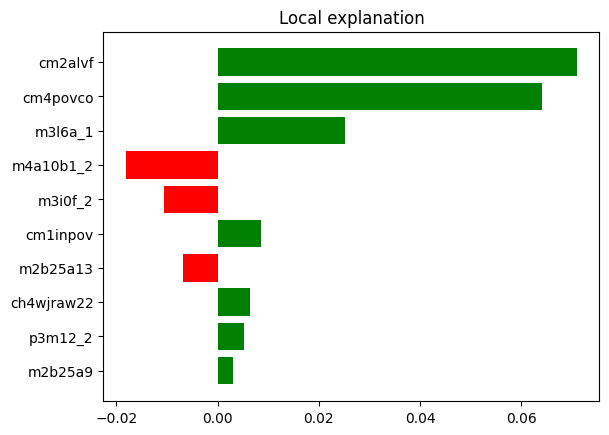

In [ ]:
# Generate explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, mode='regression',feature_names=X_test.columns.tolist(), discretize_continuous=False, random_state=1984)
# Generate explanation for instance i
i = 320
exp = explainer.explain_instance(X_test.values[i], grit_best.predict)
# Plot
fig = exp.as_pyplot_figure();